In [82]:
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

In [83]:
ds = xr.open_dataset('Africa_cru_data.nc')
ds

<xarray.Dataset> Size: 378MB
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 126MB ...
    stn      (time, lat, lon) float64 252MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [84]:
prep=ds.pre
prep

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)> Size: 126MB
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [85]:
prep_ght = prep.sel(time=slice('2012-1','2022-12'),lon=slice(-3.5,1.5),lat=slice(4.5,11.5))
prep_ght

<xarray.DataArray 'pre' (time: 108, lat: 14, lon: 10)> Size: 60kB
[15120 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 864B 2012-01-16 2012-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [86]:
prep_t=prep_ght.groupby('time.month').sum('time')
prep_t

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.00000000e+00, 4.03899994e+02, 4.22700012e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.46100006e+02, 3.64400024e+02, 3.58599976e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.64700012e+02, 2.76899994e+02, 2.81399994e+02, ...,
         1.49900009e+02, 2.23799973e+02, 0.00000000e+00],
        ...,
        [1.61000004e+01, 5.19999981e+00, 9.90000057e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.28999996e+01, 6.30000019e+00, 6.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [7.09999943e+00, 7.09999990e+00, 7.19999981e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 4.07000000e+02, 4.28100037e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.36799988e+02, 4.77199982e+02, 4.72100006e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.55500000e+02, 4.86600006e+02, 5.01200043e+02, ...,
         2.70599976e+02, 4.38199982e+02, 0.00000000e+00],
...
         2.58000011e+01, 2.60999985e+01, 2.73999996e+01],
        [5.06000023e+01, 3.45000000e+01, 3.27999992e+01, ...,
         1.10999994e+01, 1.08000002e+01, 1.16999998e+01],
        [3.48000031e+01, 2.52999992e+01, 1.73999996e+01, ...,
         6.49999952e+00, 6.50000000e+00, 4.69999981e+00]],

       [[0.00000000e+00, 5.57100037e+02, 5.62600037e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.90100037e+02, 4.92700012e+02, 4.67600006e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.97399994e+02, 4.01500000e+02, 4.02500000e+02, ...,
         2.69400024e+02, 3.37000031e+02, 0.00000000e+00],
        ...,
        [3.20000005e+00, 2.79999995e+00, 2.99999952e+00, ...,
         7.40000010e+00, 1.21000004e+01, 1.24000015e+01],
        [1.50000000e+00, 1.50000000e+00, 1.80000019e+00, ...,
         4.00000000e+00, 8.50000000e+00, 3.79999995e+00],
        [8.00000012e-01, 8.00000012e-01, 9.00000036e-01, ...,
         2.60000014e+00, 5.50000000e+00, 4.00000000e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [87]:
prep_T=prep_t.groupby('month').mean('month')
prep_T

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.00000000e+00, 4.03899994e+02, 4.22700012e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.46100006e+02, 3.64400024e+02, 3.58599976e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.64700012e+02, 2.76899994e+02, 2.81399994e+02, ...,
         1.49900009e+02, 2.23799973e+02, 0.00000000e+00],
        ...,
        [1.61000004e+01, 5.19999981e+00, 9.90000057e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.28999996e+01, 6.30000019e+00, 6.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [7.09999943e+00, 7.09999990e+00, 7.19999981e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 4.07000000e+02, 4.28100037e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.36799988e+02, 4.77199982e+02, 4.72100006e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.55500000e+02, 4.86600006e+02, 5.01200043e+02, ...,
         2.70599976e+02, 4.38199982e+02, 0.00000000e+00],
...
         2.58000011e+01, 2.60999985e+01, 2.73999996e+01],
        [5.06000023e+01, 3.45000000e+01, 3.27999992e+01, ...,
         1.10999994e+01, 1.08000002e+01, 1.16999998e+01],
        [3.48000031e+01, 2.52999992e+01, 1.73999996e+01, ...,
         6.49999952e+00, 6.50000000e+00, 4.69999981e+00]],

       [[0.00000000e+00, 5.57100037e+02, 5.62600037e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.90100037e+02, 4.92700012e+02, 4.67600006e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.97399994e+02, 4.01500000e+02, 4.02500000e+02, ...,
         2.69400024e+02, 3.37000031e+02, 0.00000000e+00],
        ...,
        [3.20000005e+00, 2.79999995e+00, 2.99999952e+00, ...,
         7.40000010e+00, 1.21000004e+01, 1.24000015e+01],
        [1.50000000e+00, 1.50000000e+00, 1.80000019e+00, ...,
         4.00000000e+00, 8.50000000e+00, 3.79999995e+00],
        [8.00000012e-01, 8.00000012e-01, 9.00000036e-01, ...,
         2.60000014e+00, 5.50000000e+00, 4.00000000e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [88]:
where=prep_T.groupby('month').where(prep_T>250)
where

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[       nan,  403.9    ,  422.7    , ...,        nan,
                nan,        nan],
        [ 346.1    ,  364.40002,  358.59998, ...,        nan,
                nan,        nan],
        [ 264.7    ,  276.9    ,  281.4    , ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  407.     ,  428.10004, ...,        nan,
                nan,        nan],
        [ 436.8    ,  477.19998,  472.1    , ...,        nan,
                nan,        nan],
        [ 455.5    ,  486.6    ,  501.20004, ...,  270.59998,
          438.19998,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  557.10004,  562.60004, ...,        nan,
                nan,        nan],
        [ 490.10004,  492.7    ,  467.6    , ...,        nan,
                nan,        nan],
        [ 397.4    ,  401.5    ,  402.5    , ...,  269.40002,
          337.00003,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [89]:
filled_data = where.fillna(0)
filled_data

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[   0.     ,  403.9    ,  422.7    , ...,    0.     ,
            0.     ,    0.     ],
        [ 346.1    ,  364.40002,  358.59998, ...,    0.     ,
            0.     ,    0.     ],
        [ 264.7    ,  276.9    ,  281.4    , ...,    0.     ,
            0.     ,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  407.     ,  428.10004, ...,    0.     ,
            0.     ,    0.     ],
        [ 436.8    ,  477.19998,  472.1    , ...,    0.     ,
            0.     ,    0.     ],
        [ 455.5    ,  486.6    ,  501.20004, ...,  270.59998,
          438.19998,    0.     ],
...
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  557.10004,  562.60004, ...,    0.     ,
            0.     ,    0.     ],
        [ 490.10004,  492.7    ,  467.6    , ...,    0.     ,
            0.     ,    0.     ],
        [ 397.4    ,  401.5    ,  402.5    , ...,  269.40002,
          337.00003,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

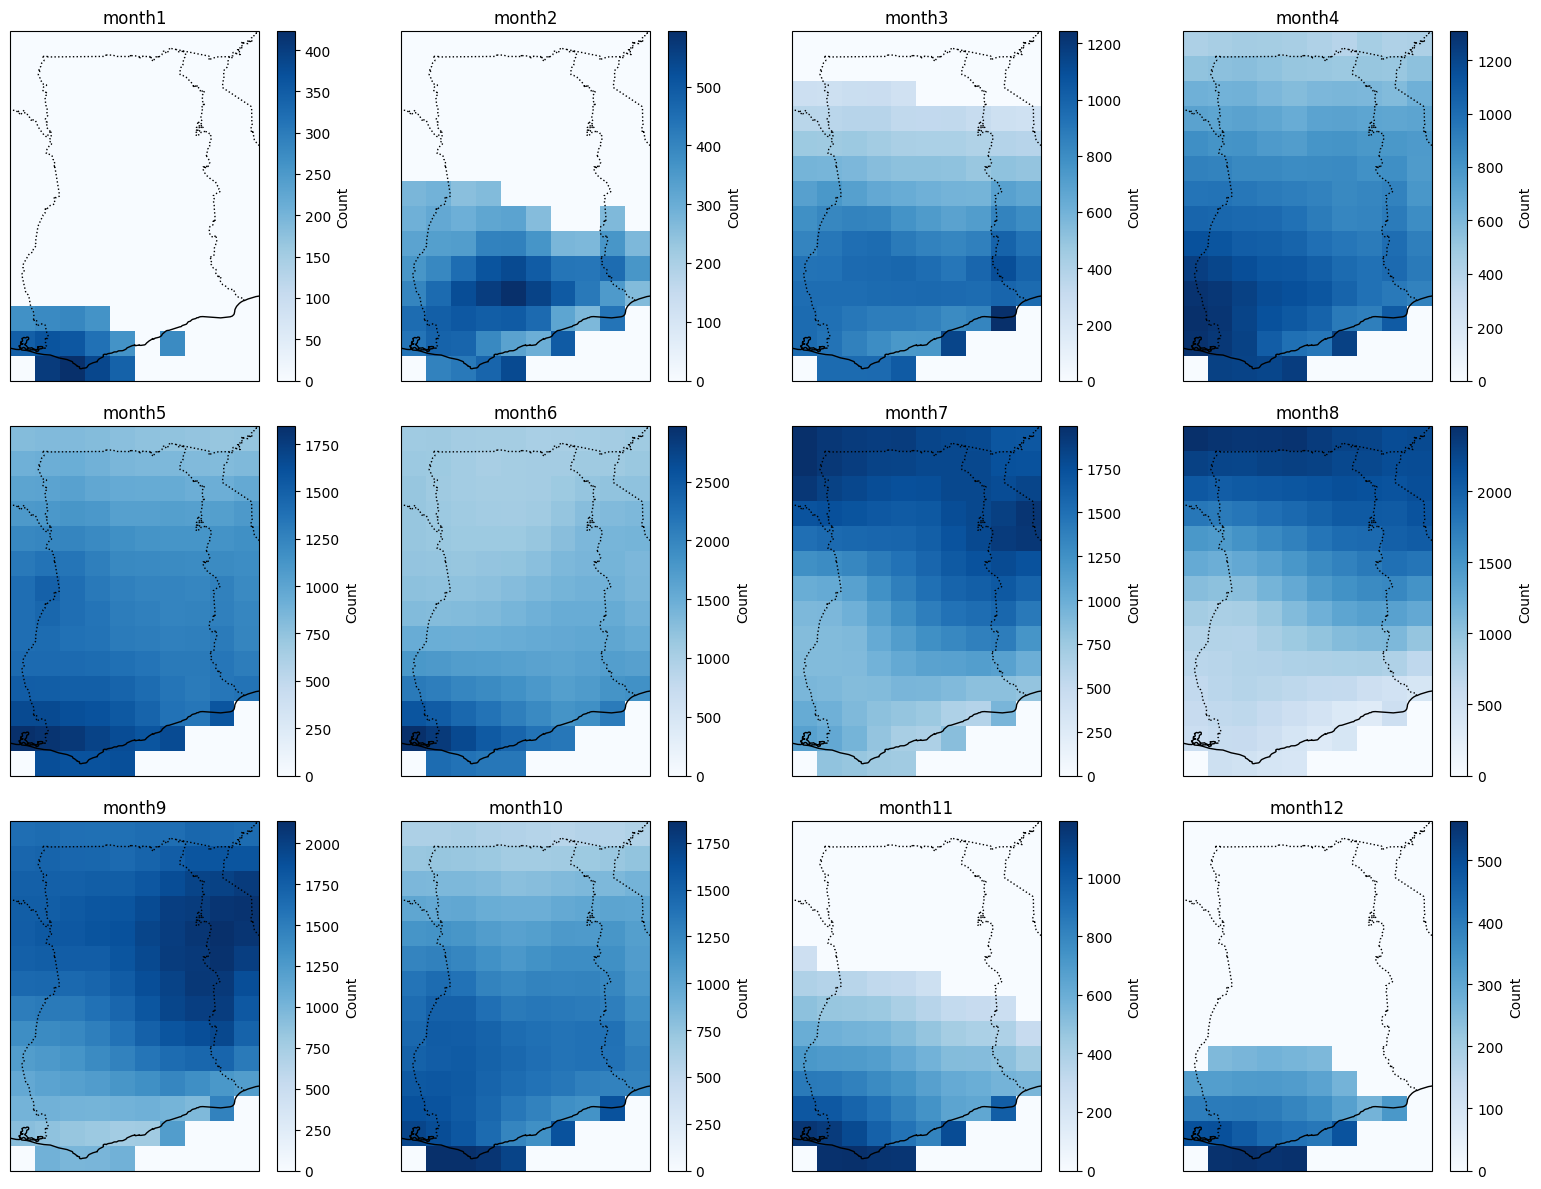

In [92]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12),subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(12):
    month_data = filled_data.isel(month=i)
    month_data.plot(ax=axes[i],transform=ccrs.PlateCarree(),  cmap='Blues',cbar_kwargs={'label': 'Count'})
    
    axes[i].set_title(f'month{i + 1}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

    
    
    axes[i].coastlines()
    axes[i].add_feature(cfeature.BORDERS, linestyle=':')
    axes[i].add_feature(cfeature.LAND, edgecolor='black', alpha=0.8)
    axes[i].add_feature(cfeature.OCEAN, alpha=0.5)

plt.tight_layout()
plt.show()